<a href="https://colab.research.google.com/github/BalajiMurugadas/Customer-Conversion-Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Conversion Prediction**

---

# **Problem Statement**
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train (2).csv')

In [ ]:
data.shape

(45211, 11)

In [ ]:
data.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
data.shape

(45211, 11)

In [ ]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# **Data Cleaning**

In [ ]:
#Checking for null values in each column
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
#Checking for the datatypes of each column
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
#Viewing for how many columns in the dataframe falls in the object and the numeric datatype
pd.DataFrame(data.dtypes.value_counts()).T

,object,int64
0,7,4


In [ ]:
integer_data_cols=[var for var in data.columns if data[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [ ]:
object_data_cols = [var for var in data.columns if data[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [ ]:
for i in object_data_cols:
  print(f'column "{i}"" is divided into "{len(data[i].value_counts())}"" categories.')

column "job"" is divided into "12"" categories.
column "marital"" is divided into "3"" categories.
column "education_qual"" is divided into "4"" categories.
column "call_type"" is divided into "3"" categories.
column "mon"" is divided into "12"" categories.
column "prev_outcome"" is divided into "4"" categories.
column "y"" is divided into "2"" categories.


In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<Axes: >

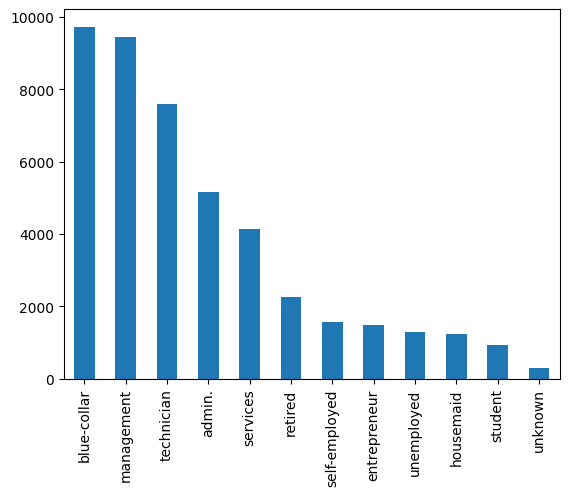

In [ ]:
data['job'].value_counts().plot(kind='bar')

In [ ]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
data['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
data['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
data['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
data['dur'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [ ]:
data['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [ ]:
data['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# **Data Visualization**

In [ ]:
!pip install seaborn==0.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


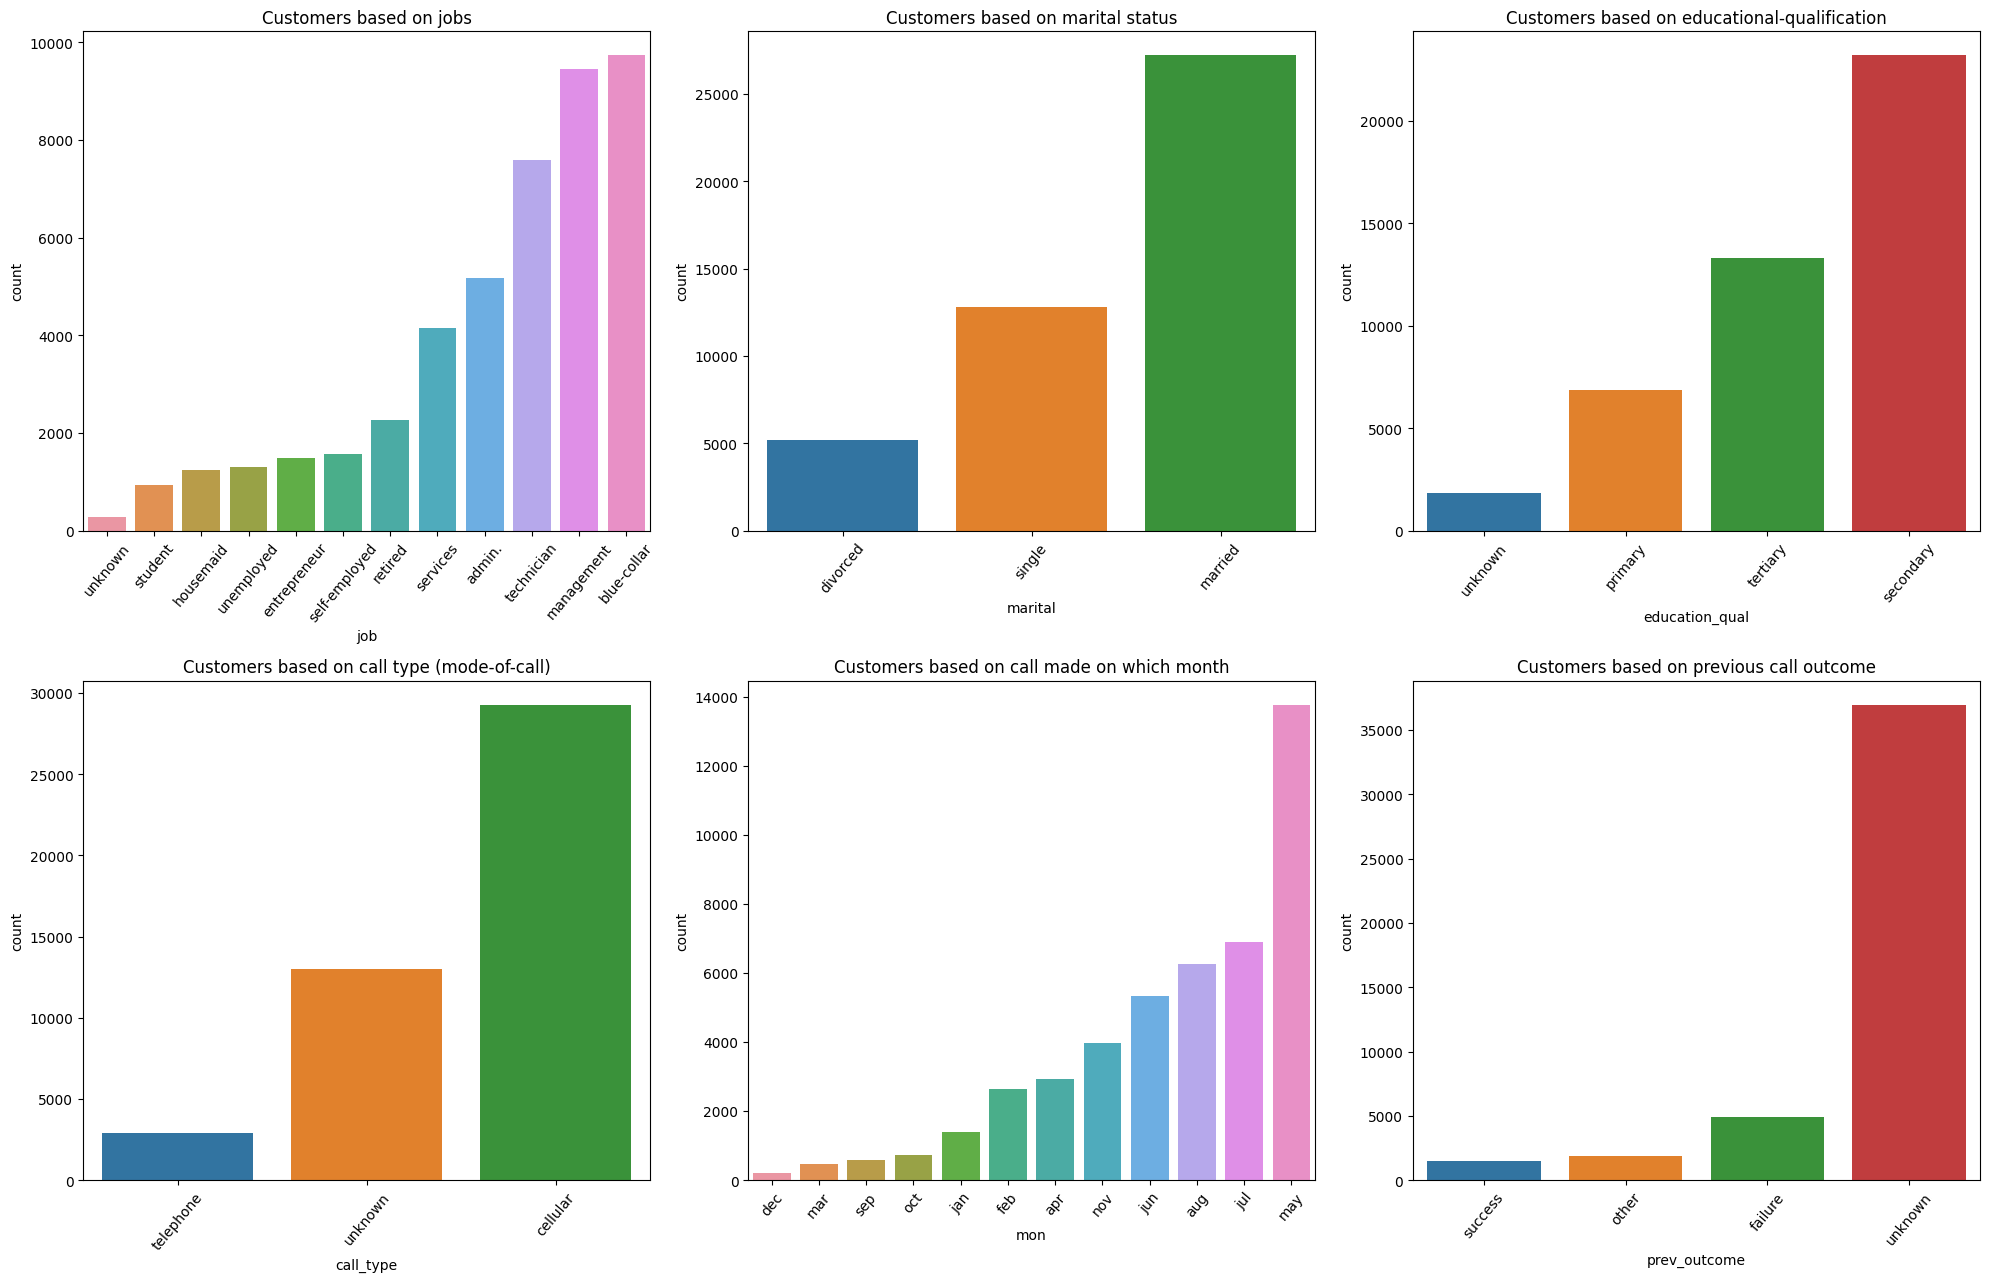

In [ ]:
#plotting count plots for all th categorical columns
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(data['job'],order=data['job'].value_counts().index[::-1])
plt.xticks(rotation=50)
plt.xlabel('job')
plt.ylabel('count')
plt.title('Customers based on jobs')

plt.subplot(432)
sns.countplot(data['marital'],order=data['marital'].value_counts().index[::-1])
plt.xticks(rotation=50)
plt.xlabel('marital')
plt.ylabel('count')
plt.title('Customers based on marital status')

plt.subplot(433)
sns.countplot(data['education_qual'],order=data['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=50)
plt.xlabel('education_qual')
plt.ylabel('count')
plt.title('Customers based on educational-qualification')

plt.subplot(434)
sns.countplot(data['call_type'],order=data['call_type'].value_counts().index[::-1])
plt.xticks(rotation=50)
plt.xlabel('call_type')
plt.ylabel('count')
plt.title('Customers based on call type (mode-of-call)')

plt.subplot(435)
sns.countplot(data['mon'],order=data['mon'].value_counts().index[::-1])
plt.xticks(rotation=50)
plt.xlabel('mon')
plt.ylabel('count')
plt.title('Customers based on call made on which month')

plt.subplot(436)
sns.countplot(data['prev_outcome'],order=data['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=50)
plt.xlabel('prev_outcome')
plt.ylabel('count')
plt.title('Customers based on previous call outcome')
plt.tight_layout()

In [ ]:
age_order = data.groupby('y')['age'].mean().reset_index().sort_values('age')['y']
day_order = data.groupby('y')['day'].mean().reset_index().sort_values('day')['y']
dur_order = data.groupby('y')['dur'].mean().reset_index().sort_values('dur')['y']
num_calls_order = data.groupby('y')['num_calls'].mean().reset_index().sort_values('num_calls')['y']

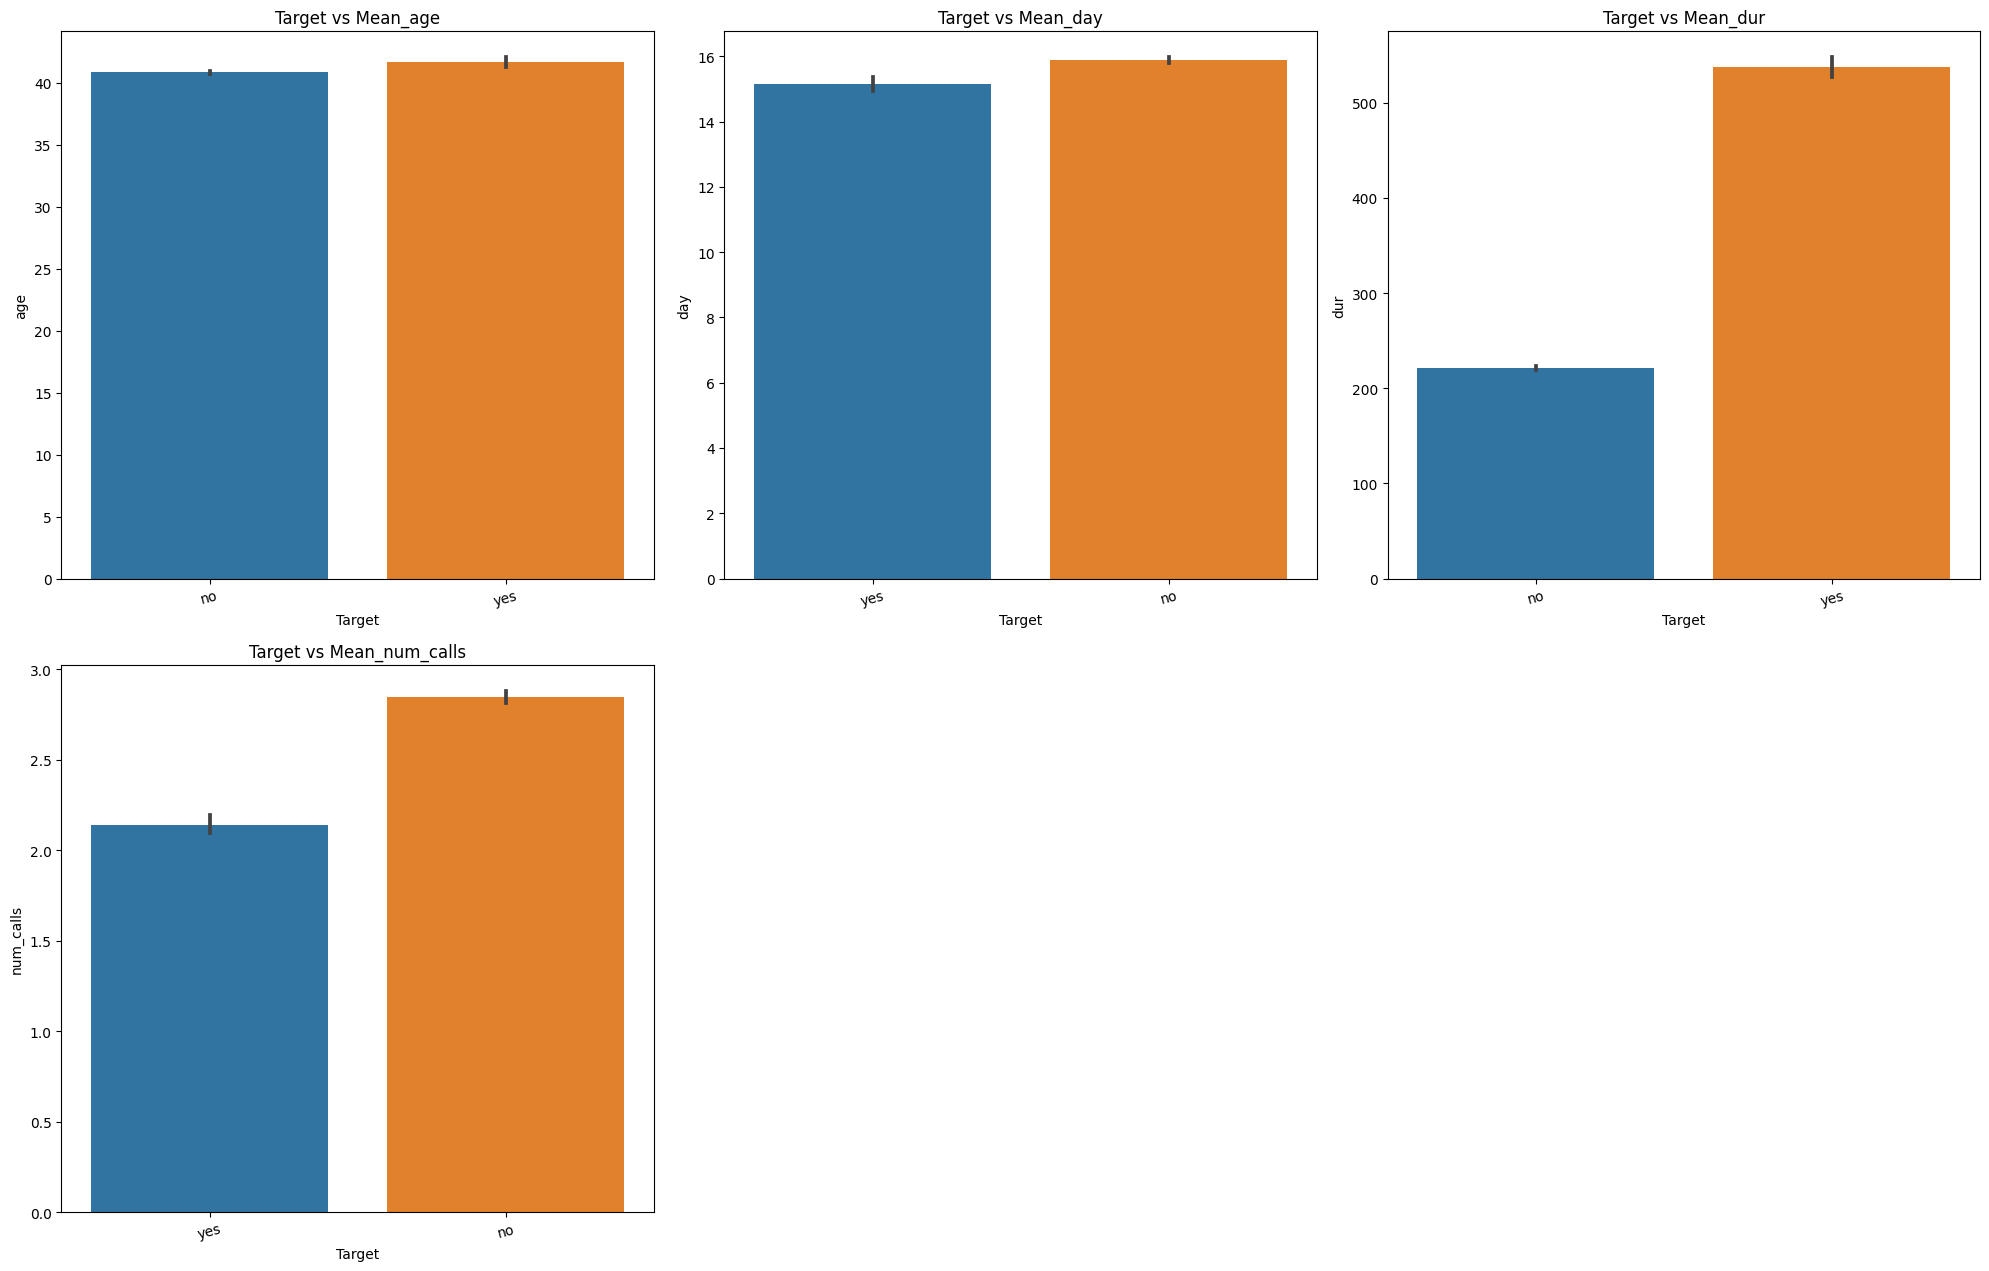

In [ ]:
#plotting bar plots for all th numeric columns vs the taget column
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(data['y'],data['age'],order=age_order)
plt.xticks(rotation=15)
plt.xlabel('Target')
plt.ylabel('age')
plt.title('Target vs Mean_age')

plt.subplot(432)
sns.barplot(data['y'],data['day'],order=day_order)
plt.xticks(rotation=15)
plt.xlabel('Target')
plt.ylabel('day')
plt.title('Target vs Mean_day')

plt.subplot(433)
sns.barplot(data['y'],data['dur'],order=dur_order)
plt.xticks(rotation=15)
plt.xlabel('Target')
plt.ylabel('dur')
plt.title('Target vs Mean_dur')

plt.subplot(434)
sns.barplot(data['y'],data['num_calls'],order=num_calls_order)
plt.xticks(rotation=15)
plt.xlabel('Target')
plt.ylabel('num_calls')
plt.title('Target vs Mean_num_calls')
plt.tight_layout()

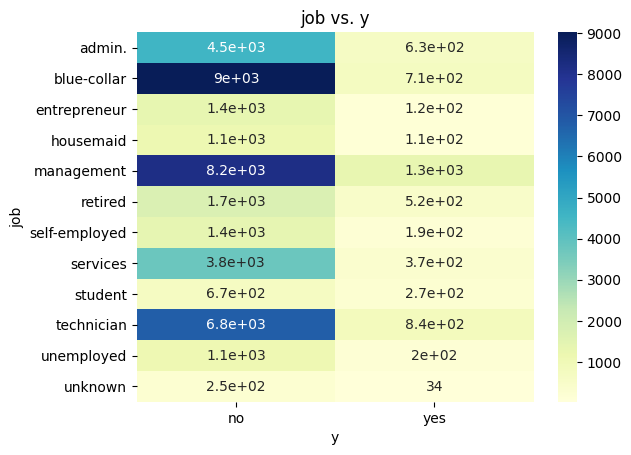

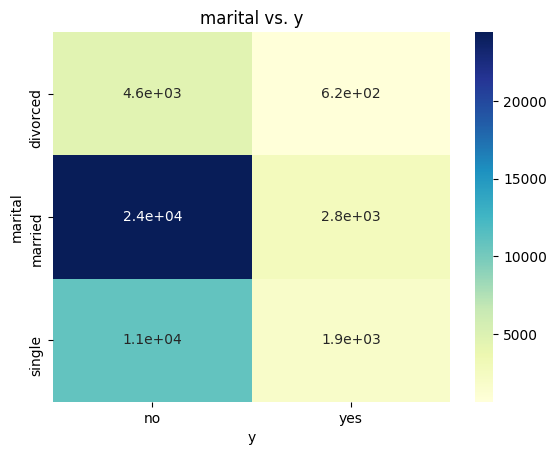

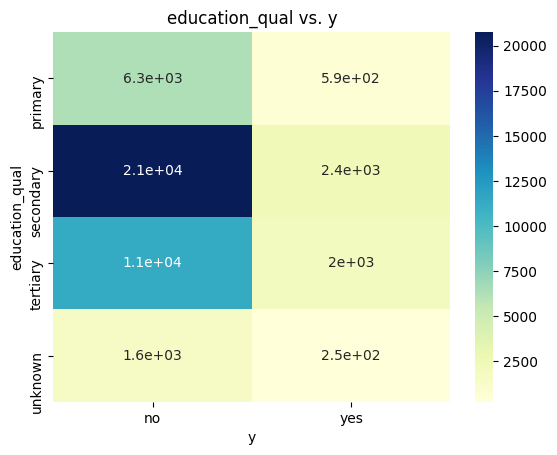

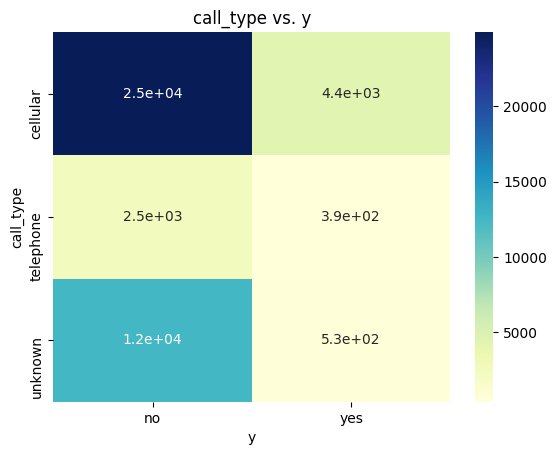

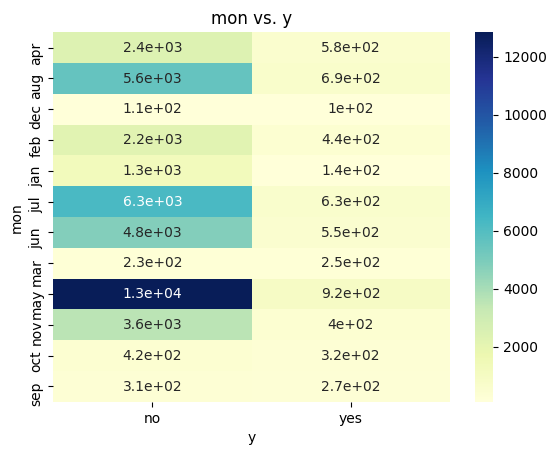

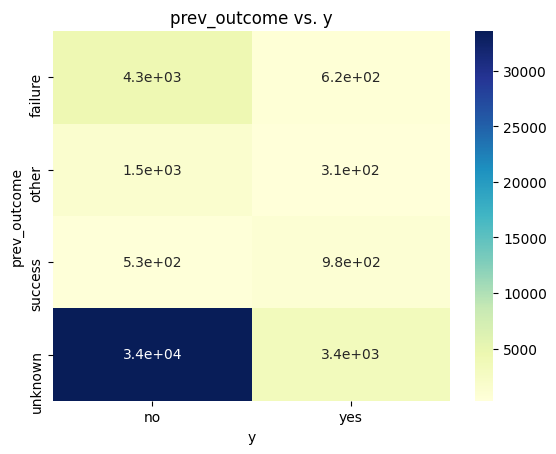

In [ ]:
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome']
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['y'])
    sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
    plt.title(column + ' vs. y')
    plt.xlabel('y')
    plt.ylabel(column)
    plt.show()

<Figure size 2000x2500 with 0 Axes>

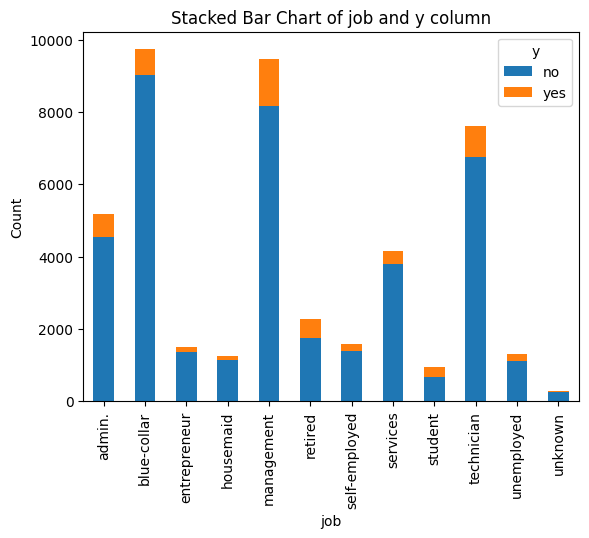

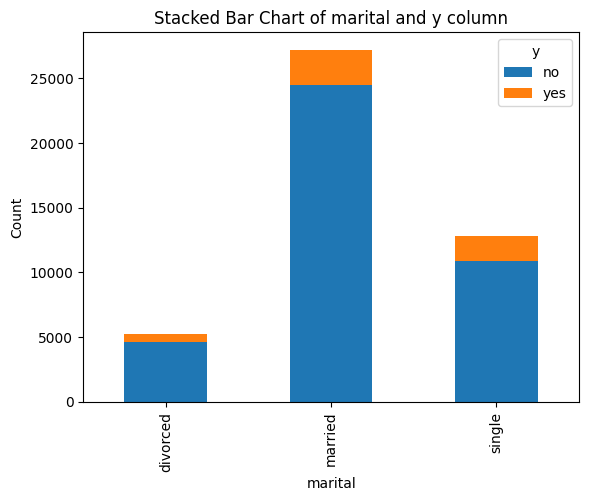

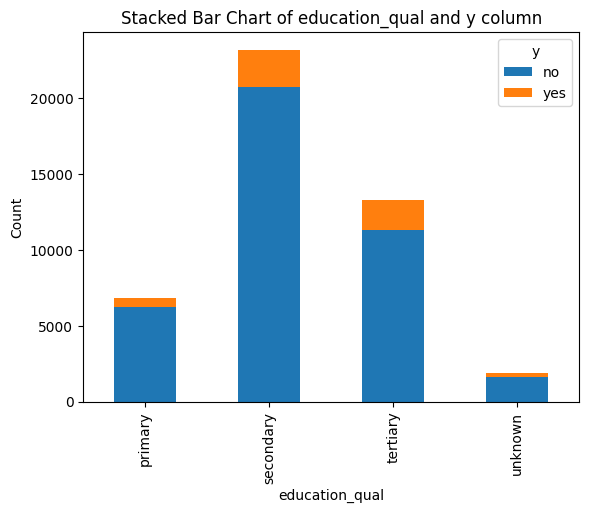

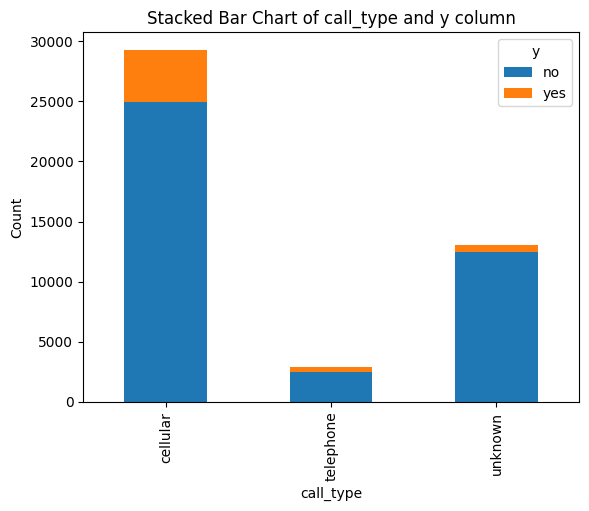

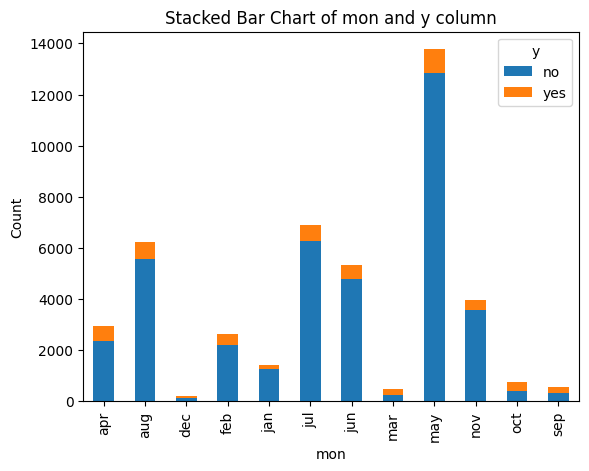

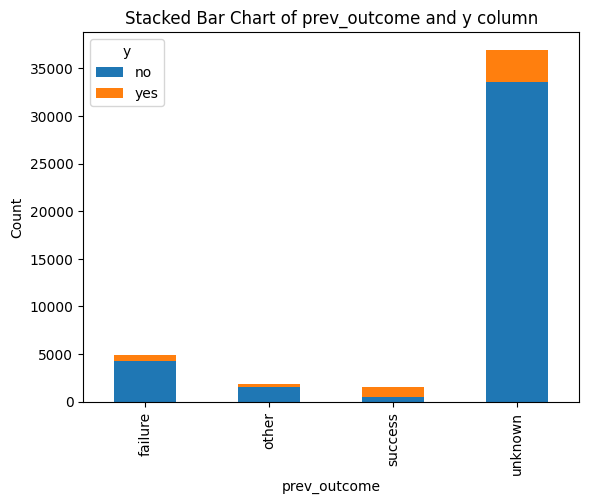

<Figure size 640x480 with 0 Axes>

In [ ]:
#plotting stacked bar plots for all th categorical columns vs the target column
plt.figure(figsize=(20,25))
#plt.subplot(431)
grouped_data1 = data.groupby(['job', 'y']).size().unstack()
grouped_data1.plot(kind='bar', stacked=True)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of job and y column')
plt.show()

#plt.subplot(432)
grouped_data2 = data.groupby(['marital', 'y']).size().unstack()
grouped_data2.plot(kind='bar', stacked=True)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of marital and y column')
plt.show()

#plt.subplot(433)
grouped_data3 = data.groupby(['education_qual', 'y']).size().unstack()
grouped_data3.plot(kind='bar', stacked=True)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of education_qual and y column')
plt.show()

#plt.subplot(434)
grouped_data4 = data.groupby(['call_type', 'y']).size().unstack()
grouped_data4.plot(kind='bar', stacked=True)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of call_type and y column')
plt.show()

#plt.subplot(435)
grouped_data5 = data.groupby(['mon', 'y']).size().unstack()
grouped_data5.plot(kind='bar', stacked=True)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of mon and y column')
plt.show()

#plt.subplot(435)
grouped_data6 = data.groupby(['prev_outcome', 'y']).size().unstack()
grouped_data6.plot(kind='bar', stacked=True)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of prev_outcome and y column')
plt.show()
plt.tight_layout()

In [ ]:
del data['day']

In [ ]:
data.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,may,198,1,unknown,no


# **Encoding categorical variables**

In [ ]:
data = pd.get_dummies(data, columns = ['job'])
data['marital'] = data['marital'].map({'single':0, 'married':1, 'divorced':2})
data['education_qual'] = data['education_qual'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})
data = pd.get_dummies(data, columns = ['call_type'])
data['mon'] = data['mon'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
data['prev_outcome'] = data['prev_outcome'].map({'unknown':-1, 'failure':0, 'success':1, 'other':2})
data['y'] = data['y'].map({'no':0, 'yes':1})

In [ ]:
data.head()

,age,marital,education_qual,mon,dur,num_calls,prev_outcome,y,job_admin.,job_blue-collar,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,call_type_cellular,call_type_telephone,call_type_unknown
0,58,1,3,5,261,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,0,2,5,151,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,1,2,5,76,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47,1,0,5,92,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,33,0,0,5,198,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
data.columns

Index(['age', 'marital', 'education_qual', 'mon', 'dur', 'num_calls',
       'prev_outcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'call_type_cellular',
       'call_type_telephone', 'call_type_unknown'],
      dtype='object')

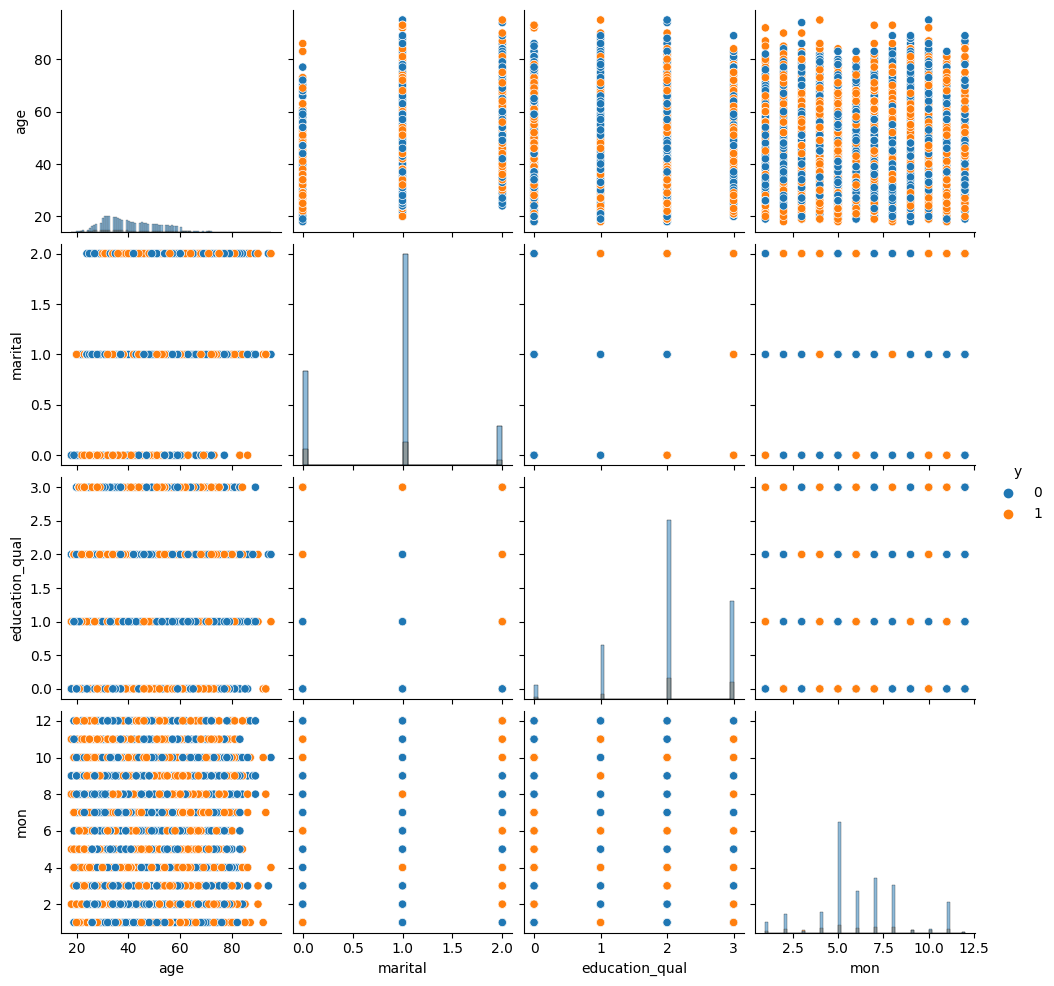

In [ ]:
# Select the columns to be used in the pair plot
cols = ['age', 'marital', 'education_qual', 'mon', 'y']

# Plot the pair plot
sns.pairplot(data[cols], diag_kind='hist', hue='y')

Text(0, 0.5, 'Frequency')

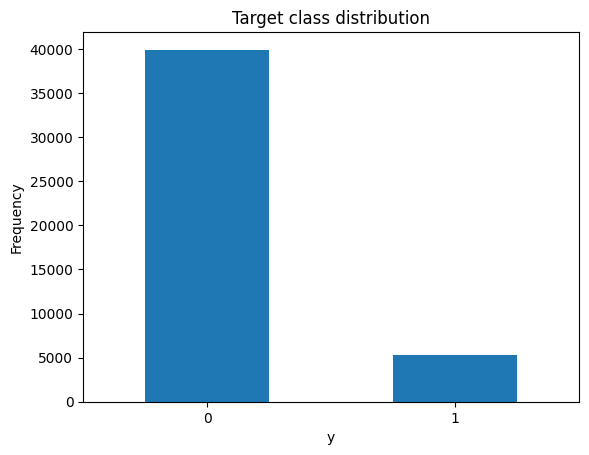

In [ ]:
count_classes = pd.value_counts(data['y'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('Target class distribution')
#plt.xticks(range(2), LABLES)
plt.xlabel('y')
plt.ylabel('Frequency')

In [ ]:
yes = data[data['y'] == 1]
no = data[data['y'] == 0]
print(yes.shape, no.shape)

(5289, 23) (39922, 23)


**Observation:**

The dataset we are having is a imbalanced dataset because in the target column we have 39922 datapoints for class 'no' and only 5289 datapoints for class 'yes'. So before geeting into machine learning part the data should be balanced using either oversampling or undersampling technique.

# **Splitting the data into input data and output data**

In [ ]:
#creating a function which will take the whole dataframe as input and return 2 dataframes, one containing input variables and the other
# holding the target variable

def split(dataframe):
  X = dataframe.drop('y',axis=1)
  y = dataframe['y']
  return X,y

In [ ]:
X, y = split(data)

In [ ]:
X

,age,marital,education_qual,mon,dur,num_calls,prev_outcome,job_admin.,job_blue-collar,job_entrepreneur,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,call_type_cellular,call_type_telephone,call_type_unknown
0,58,1,3,5,261,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,0,2,5,151,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,1,2,5,76,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,47,1,0,5,92,1,-1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,33,0,0,5,198,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,3,11,977,3,-1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45207,71,2,1,11,456,2,-1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
45208,72,1,2,11,1127,5,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
45209,57,1,2,11,508,4,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# **Oversampling the dataset**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
#Implementing oversampling for handling imbalance in the dataset
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

In [ ]:
X_res.shape, y_res.shape

((78918, 22), (78918,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 39459, 1: 39459})


# **Splitting the data into train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

# **Building Machine Learning Model**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
print('AUROC score:', auc_score)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

AUROC score: 0.8801441548318019


In [ ]:
print('AUROC score:', auc_score)
y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
cross_val_logreg = cross_val_score(logreg,X_train,y_train,cv = 15).mean()
print('cross val score: ',cross_val_logreg)

AUROC score: 0.8801441548318019
F1 score: 0.8796543398144617


In [ ]:
y_test

71142    1
78431    1
57480    1
42625    1
73790    1
        ..
57827    1
40878    0
77349    1
39810    1
5639     0
Name: y, Length: 15784, dtype: int64

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from sklearn.metrics import plot_confusion_matrix

In [ ]:
#plot_confusion_matrix(logreg,X_test,y_test)

# **K Nearest Neighbour Classifier**

# **Chossing the best K(neighbour) value**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,11)
cross_val_knn=[]
for k in knn_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled,y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  y_prob = knn.predict_proba(X_test_scaled)[:, 1]
  auroc = roc_auc_score(y_test, y_prob)

  print("K value : ", k, " accuracy score : ", accuracy, 'AUROC score:', auroc, "cross_val_score : ", cross_val_score(knn,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn,X_train_scaled,y_train,cv = 10).mean())

K value :  1  accuracy score :  0.4924607197161683 AUROC score: 0.9182629305835569 cross_val_score :  0.9199797131390091
K value :  2  accuracy score :  0.4943613786112519 AUROC score: 0.9469112104732964 cross_val_score :  0.9212944454331758
K value :  3  accuracy score :  0.518816523061328 AUROC score: 0.9566851373709286 cross_val_score :  0.9236069303272867
K value :  4  accuracy score :  0.5204637607704004 AUROC score: 0.9638121176351857 cross_val_score :  0.9227199396130714
K value :  5  accuracy score :  0.5079194120628484 AUROC score: 0.9667370039820256 cross_val_score :  0.9226249026537243
K value :  6  accuracy score :  0.5182463253928028 AUROC score: 0.9693099334503874 cross_val_score :  0.92233978926692
K value :  7  accuracy score :  0.5079194120628484 AUROC score: 0.9709935730556002 cross_val_score :  0.9223556220701097
K value :  8  accuracy score :  0.5079827673593512 AUROC score: 0.9722167390232159 cross_val_score :  0.9214369356443589
K value :  9  accuracy score :  0.5

In [ ]:
cross_val_knn_classifier=max(cross_val_knn)
cross_val_knn_classifier

0.9236069303272867

In [ ]:
print("The best K-Value is 3 and Cross_val_score is",cross_val_knn_classifier)

The best K-Value is 3 and Cross_val_score is 0.9236069303272867


# **Implementing K Nearest Neighbor Classifier**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
cross_val_knn_classifier=cross_val_score(knn,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_classifier

0.9235594045110046

# **Decission Tree Classifier**

# **Choosing the best of depth Value**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_classifier= DecisionTreeClassifier(max_depth=d, random_state=0)
  dt_classifier.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_classifier.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_classifier,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_classifier,X_train,y_train,cv = 15).mean())

Depth :  1  train Score  :  0.7217030443184338 cross_val_score :  0.7216238304002438
Depth :  2  train Score  :  0.7760636107327272 cross_val_score :  0.7760476900696528
Depth :  3  train Score  :  0.7961320366205215 cross_val_score :  0.7995057026692455
Depth :  4  train Score  :  0.8234865524123294 cross_val_score :  0.8200334751020882
Depth :  5  train Score  :  0.8417651344758768 cross_val_score :  0.8379953851379491
Depth :  6  train Score  :  0.8582380333892989 cross_val_score :  0.8531536095174171
Depth :  7  train Score  :  0.8682484873443786 cross_val_score :  0.864177835322402
Depth :  8  train Score  :  0.8798903918649222 cross_val_score :  0.8729210762380449
Depth :  9  train Score  :  0.8923401020052587 cross_val_score :  0.8796368929697089
Depth :  10  train Score  :  0.9023822346120949 cross_val_score :  0.8879049917477214
Depth :  11  train Score  :  0.9160040548674249 cross_val_score :  0.8935913100089404
Depth :  12  train Score  :  0.92707574365635 cross_val_score : 

In [ ]:
cross_val_dt_classifier=max(cross_val_dt)
cross_val_dt_classifier

0.9142141921725458

In [ ]:
print("The best depth is 19 and Cross_val_score is:",cross_val_dt_classifier)

The best depth is 19 and Cross_val_score is: 0.9142141921725458


# **Implementing Decision Tree Regression**

In [ ]:
dt_classifier=DecisionTreeClassifier(max_depth=19, random_state=0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, random_state=0)

In [ ]:
cross_val_dt_classifier=cross_val_score(dt_classifier,X_train,y_train,cv=15).mean()
cross_val_dt_classifier

0.9142141921725458

In [ ]:
ftImp = list(zip(dt_classifier.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
4,0.384542,dur
6,0.130542,prev_outcome
3,0.094853,mon
21,0.093303,call_type_telephone
0,0.072890,age
8,0.036058,job_admin.
5,0.025458,num_calls
16,0.018872,job_student
14,0.017351,job_self-employed
11,0.016736,job_housemaid


# **Random Forest Classifier**

# **Choosing the best depth value**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_classifier=RandomForestClassifier(max_depth=d, random_state=0)
  rf_classifier.fit(X_train,y_train)
  y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, y_pred_proba)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_classifier,X_train,y_train,cv = 15).mean(), "AUROC_Score :", auc)
  cross_val_rf.append(cross_val_score(rf_classifier,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.8374884368730053 AUROC_Score : 0.9116891963120038
Depth :  4 cross_val_score :  0.8588398374417063 AUROC_Score : 0.9369437020738055
Depth :  8 cross_val_score :  0.8937496894668043 AUROC_Score : 0.9626152860098244
Depth :  10 cross_val_score :  0.904567996004699 AUROC_Score : 0.9704792585341133
Depth :  11 cross_val_score :  0.9099375741703832 AUROC_Score : 0.9731449121850045
Depth :  12 cross_val_score :  0.9144517293650128 AUROC_Score : 0.9757235741900645
Depth :  13 cross_val_score :  0.9199004991416487 AUROC_Score : 0.9779924784943563
Depth :  15 cross_val_score :  0.9275350725601275 AUROC_Score : 0.9816319729103117
Depth :  18 cross_val_score :  0.9332372223682669 AUROC_Score : 0.9852121026535142
Depth :  20 cross_val_score :  0.9363576067157678 AUROC_Score : 0.986114383055007


In [ ]:
cross_val_rf_classifier=max(cross_val_rf)
cross_val_rf_classifier

0.9363576067157678

In [ ]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_classifier)

The best depth is 20 and Cross_val_score is: 0.9363576067157678


# **Implementing Random Forest Regression**

In [ ]:
rf_classifier=RandomForestClassifier(max_depth=20, random_state=0)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [ ]:
cross_val_rf_classifier=cross_val_score(rf_classifier,X_train,y_train,cv=15).mean()
cross_val_rf_classifier

0.9363576067157678

# **Extreme Gradient Boosting Classifier**

# **Choosing the best Learning Rate**

In [ ]:
import xgboost as xgb

In [ ]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_classifier= xgb.XGBClassifier(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_classifier.fit(X_train,y_train)
  y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, y_pred_proba)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_classifier,X_train,y_train,cv = 15).mean(), "AUROC_score:", auc)
  cross_val_xgb.append(cross_val_score(xgb_classifier,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.9250799444186985 AUROC_score: 0.9812232928220692
Learning rate :  0.05 cross_val_score: 0.9339658160541371 AUROC_score: 0.985362232490653
Learning rate :  0.08 cross_val_score: 0.9353596584180015 AUROC_score: 0.9857496524147827
Learning rate :  0.09 cross_val_score: 0.9357714894241053 AUROC_score: 0.9858279729967013
Learning rate :  0.1 cross_val_score: 0.9357398714987288 AUROC_score: 0.9858556882861715
Learning rate :  0.11 cross_val_score: 0.9356606234271964 AUROC_score: 0.9858571736073046
Learning rate :  0.12 cross_val_score: 0.9362466767302007 AUROC_score: 0.9856323521890704
Learning rate :  0.13 cross_val_score: 0.9365001132222853 AUROC_score: 0.9856883688677014
Learning rate :  0.15 cross_val_score: 0.9362308527113575 AUROC_score: 0.9856603484852414
Learning rate :  0.18 cross_val_score: 0.93664265736919 AUROC_score: 0.9855948337801205
Learning rate :  0.2 cross_val_score: 0.9368010744674413 AUROC_score: 0.9854683004770931
Learning rate :

In [ ]:
cross_val_xgb_classifier=max(cross_val_xgb)
cross_val_xgb_classifier

0.9368169248345554

In [ ]:
print("The best Learning rate is 0.3 and Cross_val_score is:",cross_val_xgb_classifier)

The best Learning rate is 0.3 and Cross_val_score is: 0.9368169248345554


# **Implementing Extreme Gradient Boosting classifier**

In [ ]:
xgb_classifier= xgb.XGBClassifier(learning_rate =0.3,n_estimators=100) # initialise the model
xgb_classifier.fit(X_train,y_train) #train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
cross_val_xgb_classifier=cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean()
cross_val_xgb_classifier

0.9309721781829691